# YAKUB TRADING GROUP - ALGORITHMIC STAFF PROMOTION

Abdullah’s Baba Yakub, 38, is the heir apparent to the highly revered Yakub business dynasty. The enterprise has spanned decades with vast investment interest in all the various sectors of the economy.

Abdullah has worked for 16 years in Europe and America after his first and second degrees at Harvard University where he studied Engineering and Business Management. He is a very experienced technocrat and a global business leader who rose through the rank to become a Senior Vice President at a leading US business conglomerate. His dad is now 70 and has invited him to take over the company with a mandate to take it to the next level of growth as a sustainable legacy. Abdullah is trusted by his father and his siblings to lead this mandate.

On resumption, he had an open house with the staff to share his vision and to listen to them on how to take the business to the next level. Beyond the general operational issues and increasing need for regulatory compliance, one of the issues raised by the staff was a general concern on the process of staff promotion. Many of the staff allege that it is skewed and biased. Abdullah understood the concern and promised to address it in a most scientific way.

You have been called in by Abdullah to use your machine learning skills to study the pattern of promotion. With this insight, he can understand the important features among available features that can be used to predict promotion eligibility.

The dataset contains these variables as explained below:

• EmployeeNo : System-generated unique staff ID

• Division: Operational department where each employee works

• Qualification: Highest qualification received by the staff

• Gender: Male or Female

• ChannelofRecruitment: How the staff was recruited – this is via internal process, use of an agent or special referral

• Trainings_Attended : Unique paid and unpaid trainings attended by each staff in the previous business cycle

• Yearofbirth: Year that the employee was born

• LastPerformanceScore Previous year overall performance HR score and rated on a scale of 0-14

• Yearofrecruitment : The year that each staff was recruited into the company

• Targets_met: A measure of employees who meet the annual set target. If met, the staff scores 1 but if not, it is a 0.

• Previous_Award : An indicator of previous award won. If yes, it is a 1 and if No it is a 0.

• Trainingscoreaverage: Feedback score on training attended based on evaluation

• StateOfOrigin: The state that the employee claims

• Foreign_schooled: An indicator of staff who had any of their post-secondary education outside the country. Responses are in Yes or No

• Marital_Status: Marriage status of employees and recorded as Yes or No

• PastDisciplinaryAction : An indicator if a staff has been summoned to a disciplinary panel in the past. This is indicated as Yes or No

• PreviousIntraDepartmentalMovement : This is an indicator to identify staff who have moved between departments in the past. Yes and No are the responses.

• Noofprevious_employers : A list of the number of companies that an employee worked with before joining the organisation. This is recorded as counts

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix,classification_report
import random
import missingno as msno
'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

#import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
#cf.go_offline()  
#cf.set_config_file(offline=False, world_readable=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))
plt.rcParams['figure.figsize'] = [16, 10]
import xgboost as xgb

In [48]:
df=pd.read_csv('train.csv')
df.shape

(38312, 19)

In [49]:
df.head(5)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

# DATA ANALYSIS

**Distribution of staffs in the company Department**

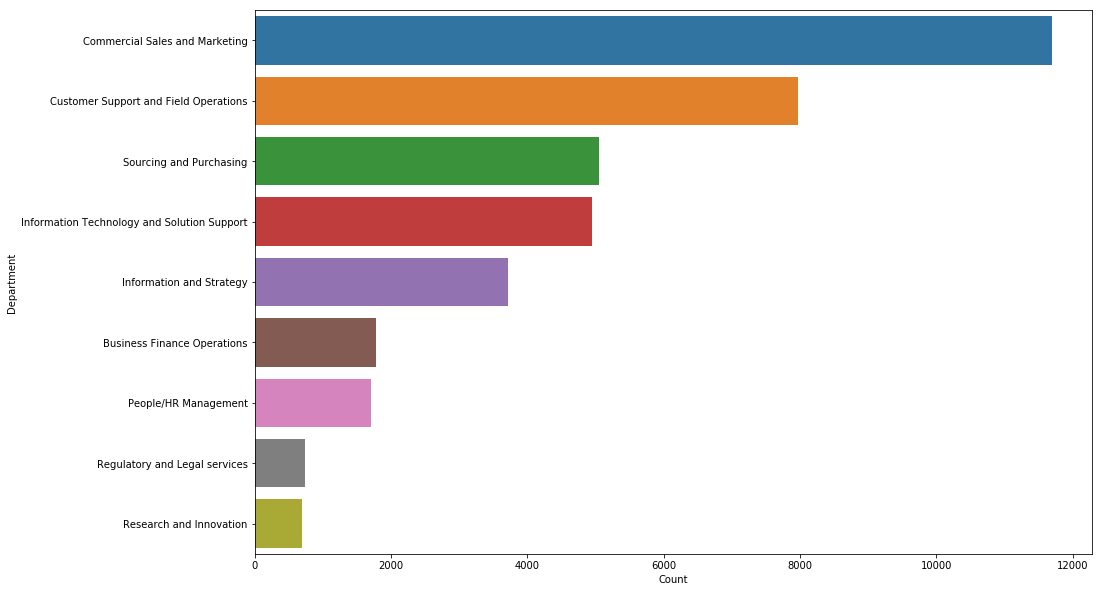

In [51]:
dff1=df['Division'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(y=dff1['index'],x=dff1['Division'],data=df)
plt.ylabel('Department')
plt.xlabel('Count')
bold("**Distribution of staffs in the company Department**")

**Ratio of Male Staff to Female Staff in the Company**

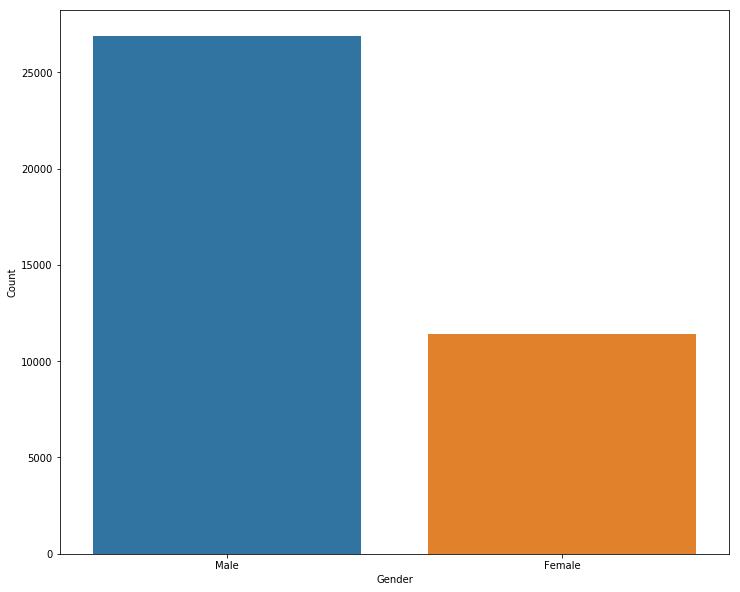

In [52]:
dff=df['Gender'].value_counts().reset_index()
plt.figure(figsize=(12,10))
sns.barplot(x=dff['index'],y=dff['Gender'],data=df)
plt.ylabel('Count')
plt.xlabel('Gender')
bold("**Ratio of Male Staff to Female Staff in the Company**")

**Number of training attended by the staffs**

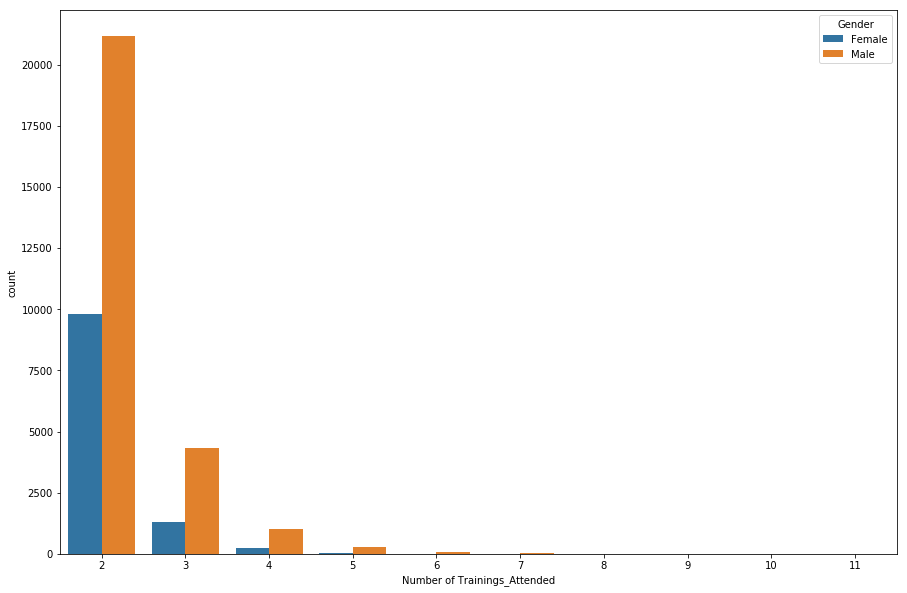

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Trainings_Attended'],hue='Gender',data=df)
plt.xlabel('Number of Trainings_Attended')
bold("**Number of training attended by the staffs**")

**Channel of Recruitment of the staffs**

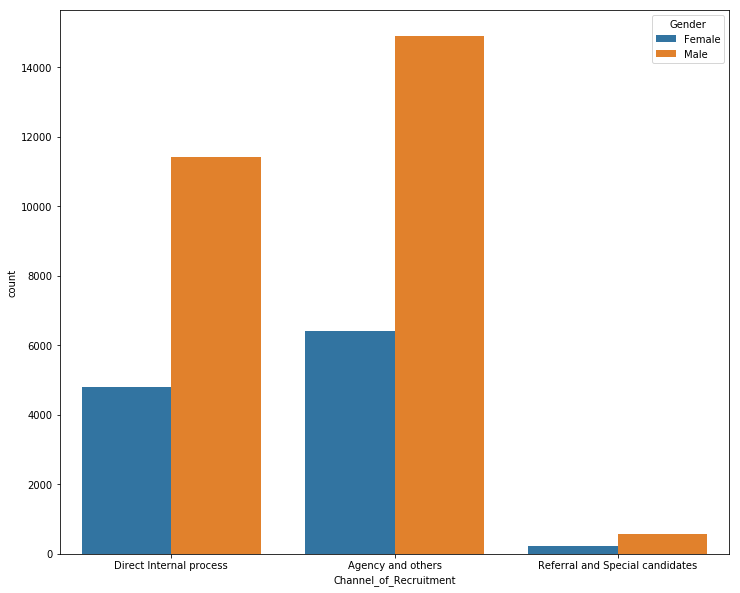

In [54]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Channel_of_Recruitment'],hue=df['Gender'])
bold("**Channel of Recruitment of the staffs**")

**Last staff performance score**

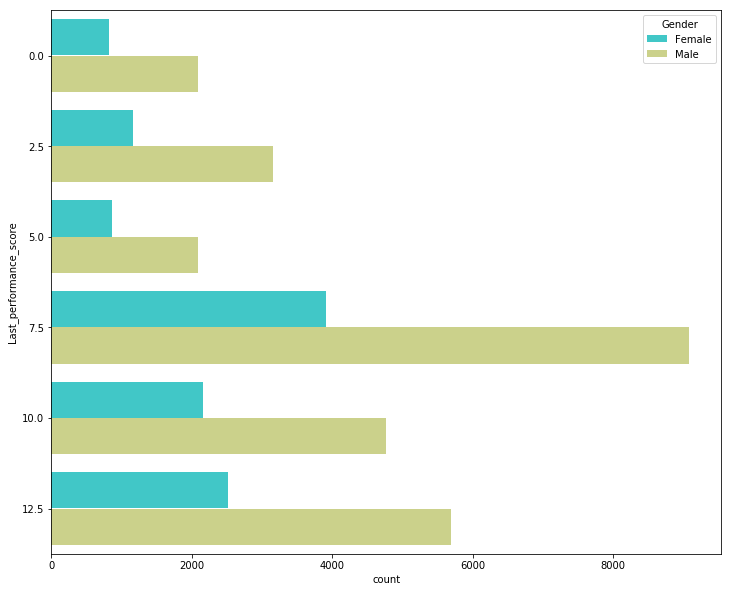

In [55]:
plt.figure(figsize=(12,10))
sns.countplot(y=df['Last_performance_score'],hue=df['Gender'],palette='rainbow')
bold("**Last staff performance score**")

In [56]:
'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs,title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values,
                   title=title,
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True)
    return trace

bold("**THE COMPANY HAS MORE MALE THAN FEMALE**")
py.iplot([pie_plot(df['Gender'].value_counts(),'Gender distribution of the staffs')])
plt.show()


def pie_plot(cnt_srs,title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values,
                   title=title,
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True)
    return trace

bold("**THE COMPANY HAVE MORE FOREIGN SCHOOLED**")
py.iplot([pie_plot(df['Foreign_schooled'].value_counts(),'Foreign_schooled')])
plt.show()

**THE COMPANY HAS MORE MALE THAN FEMALE**

**THE COMPANY HAVE MORE FOREIGN SCHOOLED**

In [57]:
trace = go.Histogram(
                     x = df['Training_score_average'],
                     xbins=dict(size=0.5),
                     marker = dict(color = 'rgb(249, 6, 6)'))
layout = go.Layout(template= "plotly_dark", title = 'Distribution of Training score average', xaxis = dict(title = 'Score'))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

In [58]:
temp_df = df['State_Of_Origin'].value_counts().reset_index()[:37]


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['State_Of_Origin'],
                marker = dict(color = 'rgb(153,255,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 20 STATES WITH MOST STAFFS' , xaxis = dict(title = 'States'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [59]:
print('Total number of Department : {0}'.format(df['Division'].nunique()))
print(df['Division'].value_counts().head(9).reset_index())

Total number of Department : 9
                                         index  Division
0               Commercial Sales and Marketing     11695
1        Customer Support and Field Operations      7973
2                      Sourcing and Purchasing      5052
3  Information Technology and Solution Support      4952
4                     Information and Strategy      3721
5                  Business Finance Operations      1786
6                         People/HR Management      1704
7                Regulatory and Legal services       733
8                      Research and Innovation       696


In [60]:
print('Total number of Qualification : {0}'.format(df['Qualification'].nunique()))
print(df['Qualification'].value_counts().head(9))

Total number of Qualification : 3
First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64


In [61]:
pcols=['Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average']
i=0
while i < len(pcols):
    print('Best {0} : {1}'.format(pcols[i],df.loc[df[pcols[i]].idxmax()][0]))
    i += 1

Best Trainings_Attended : YAK/S/06208
Best Year_of_birth : YAK/S/00091
Best Last_performance_score : YAK/S/00001
Best Year_of_recruitment : YAK/S/00024
Best Targets_met : YAK/S/00001
Best Previous_Award : YAK/S/00123
Best Training_score_average : YAK/S/01504


## DATA CLEANING

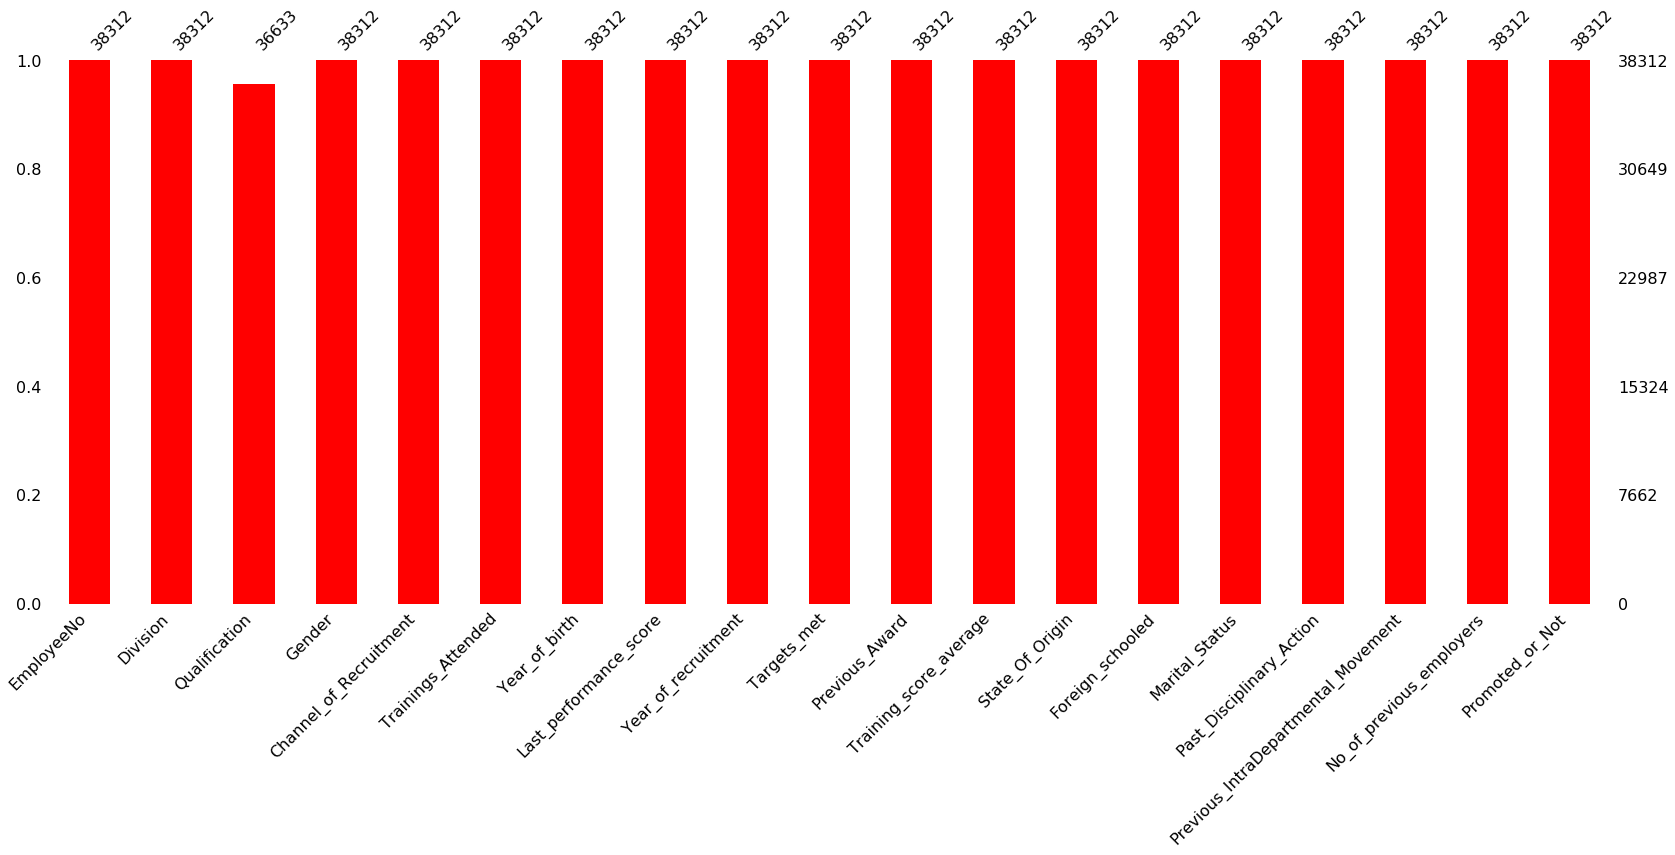

In [62]:
msno.bar(df,(28,10),color='red')

In [63]:
###### CLASSIFYING THE STATE OF ORIGIN INTO THEIR GEOPOLITICAL ZONES
#The state of Origin can be replaced with Geopolitical zones which are North Central(NC),North East(NE),
#North West(NW),South East(SE),South South(SS),South West(SW)

df['State_Of_Origin'].replace(['BENUE','KOGI','KWARA','NASSARAWA','NIGER','PLATEAU','FCT'],['NC','NC','NC','NC','NC','NC','NC'],inplace=True)
df['State_Of_Origin'].replace(['ADAMAWA','BAUCHI','BORNO','GOMBE','TARABA','YOBE'],['NE','NE','NE','NE','NE','NE'],inplace=True)
df['State_Of_Origin'].replace(['JIGAWA','KADUNA','KANO','KATSINA','KEBBI','SOKOTO','ZAMFARA'],['NW','NW','NW','NW','NW','NW','NW'],inplace=True)
df['State_Of_Origin'].replace(['ABIA','ANAMBRA','EBONYI','ENUGU','IMO'],['SE','SE','SE','SE','SE'],inplace=True)
df['State_Of_Origin'].replace(['AKWA IBOM','BAYELSA','CROSS RIVER','RIVERS','DELTA','EDO'],['SS','SS','SS','SS','SS','SS'],inplace=True)
df['State_Of_Origin'].replace(['EKITI','LAGOS','OGUN','ONDO','OSUN','OYO'],['SW','SW','SW','SW','SW','SW'],inplace=True)


df['Qualification'].unique()


school_level=['MSc, MBA and PhD', 'First Degree or HND','Non-University Education']
random_num=random.choice(school_level)
df['Qualification'].fillna(random_num,inplace=True)

df['Qualification'].notnull().unique()


df['EmployeeNo']=df['EmployeeNo'].apply(lambda x:pd.to_numeric(str(x).split('/')[-1]))



df['Year_of_birth'].replace([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959],'1950-1959',inplace=True)
df['Year_of_birth'].replace([1960,1961,1962,1963,1964,1965,1966,1967,1968,1969],'1960-1969',inplace=True)
df['Year_of_birth'].replace([1970,1971,1972,1973,1974,1975,1976,1977,1978,1979],'1970-1979',inplace=True)
df['Year_of_birth'].replace([1980,1981,1982,1983,1984,1985,1986,1987,1988,1989],'1980-1989',inplace=True)
df['Year_of_birth'].replace([1990,1991,1992,1993,1994,1995,1996,1997,1998,1999],'1990-1999',inplace=True)
df['Year_of_birth'].replace([2000,2001],'2000-2009',inplace=True)
df['Year_of_birth'].value_counts()



df['Year_of_recruitment'].replace([1980,1981,1982,1983,1984,1985,1986,1987,1988,1989],'1980-1989',inplace=True)
df['Year_of_recruitment'].replace([1990,1991,1992,1993,1994,1994,1995,1996,1997,1998,1999],'1990-1999',inplace=True)
df['Year_of_recruitment'].replace([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009],'2000-2009',inplace=True)
df['Year_of_recruitment'].replace([2010,2011,2012,2013,2014,2014,2015,2016,2017,2018,2019],'2010-2019',inplace=True)
df['Year_of_recruitment'].value_counts()


categorical=df.select_dtypes(include=[object])
categorical.head()
categorical.shape



le=preprocessing.LabelEncoder()
categorical_df=categorical.apply(le.fit_transform)
categorical_df.head()



enc=preprocessing.OneHotEncoder()
enc.fit(categorical_df)
onehotlabels=pd.DataFrame(enc.transform(categorical_df).toarray())
onehotlabels.shape
onehotlabels.head(3)


df=pd.concat([df,onehotlabels],axis=1)
df.drop(categorical,axis=1,inplace=True)
df.head()



X = df.drop('Promoted_or_Not',axis=1)
y = df['Promoted_or_Not']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=27)

# describes info about train and test set 
print("Number staffs X_train dataset: ", X_train.shape) 
print("Number staffs y_train dataset: ", y_train.shape) 
print("Number staffs X_test dataset: ", X_test.shape) 
print("Number staffs y_test dataset: ", y_test.shape) 


# import SMOTE module from imblearn library 
# pip install imblearn ( that is if you don't have imblearn installed already) 
from imblearn.over_sampling import SMOTE 

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


# Building Model using eXtreme Gradient Boost (XGBOOST )


clf = xgb.XGBClassifier(learning_rate=0.01,num_boost_round=2000,colsample_bytree=1,eta=0.3,eval_metric='mae',max_depth=11,min_child_weight=11,subsample=0.9)
clf = clf.fit(X_train_res,y_train_res)

#now we pass the testing data to the trained algorithm
prediction=clf.predict(X_test) #This is our model developed

#from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,prediction)
print(cm)

target_names=['Not_Promoted 0', 'Promoted 1']
print(classification_report(y_test,prediction,target_names=target_names))

Number staffs X_train dataset:  (28734, 55)
Number staffs y_train dataset:  (28734,)
Number staffs X_test dataset:  (9578, 55)
Number staffs y_test dataset:  (9578,)
Before OverSampling, counts of label '1': 2429
Before OverSampling, counts of label '0': 26305 

After OverSampling, counts of label '1': 26305
After OverSampling, counts of label '0': 26305
[[8711   55]
 [ 557  255]]
                precision    recall  f1-score   support

Not_Promoted 0       0.94      0.99      0.97      8766
    Promoted 1       0.82      0.31      0.45       812

      accuracy                           0.94      9578
     macro avg       0.88      0.65      0.71      9578
  weighted avg       0.93      0.94      0.92      9578



# Operations on Test Data

In [64]:
df1=pd.read_csv('test.csv')
df1.shape

(16496, 18)

In [65]:

df1.head()
df1['State_Of_Origin'].replace(['BENUE','KOGI','KWARA','NASSARAWA','NIGER','PLATEAU','FCT'],['NC','NC','NC','NC','NC','NC','NC'],inplace=True)
df1['State_Of_Origin'].replace(['ADAMAWA','BAUCHI','BORNO','GOMBE','TARABA','YOBE'],['NE','NE','NE','NE','NE','NE'],inplace=True)
df1['State_Of_Origin'].replace(['JIGAWA','KADUNA','KANO','KATSINA','KEBBI','SOKOTO','ZAMFARA'],['NW','NW','NW','NW','NW','NW','NW'],inplace=True)
df1['State_Of_Origin'].replace(['ABIA','ANAMBRA','EBONYI','ENUGU','IMO'],['SE','SE','SE','SE','SE'],inplace=True)
df1['State_Of_Origin'].replace(['AKWA IBOM','BAYELSA','CROSS RIVER','RIVERS','DELTA','EDO'],['SS','SS','SS','SS','SS','SS'],inplace=True)
df1['State_Of_Origin'].replace(['EKITI','LAGOS','OGUN','ONDO','OSUN','OYO'],['SW','SW','SW','SW','SW','SW'],inplace=True)


df1['Qualification'].unique()


school_level=['MSc, MBA and PhD', 'First Degree or HND','Non-University Education']
random_num=random.choice(school_level)
df1['Qualification'].fillna(random_num,inplace=True)

df1['Qualification'].notnull().unique()


df1['EmployeeNo']=df1['EmployeeNo'].apply(lambda x:pd.to_numeric(str(x).split('/')[-1]))



df1['Year_of_birth'].replace([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959],'1950-1959',inplace=True)
df1['Year_of_birth'].replace([1960,1961,1962,1963,1964,1965,1966,1967,1968,1969],'1960-1969',inplace=True)
df1['Year_of_birth'].replace([1970,1971,1972,1973,1974,1975,1976,1977,1978,1979],'1970-1979',inplace=True)
df1['Year_of_birth'].replace([1980,1981,1982,1983,1984,1985,1986,1987,1988,1989],'1980-1989',inplace=True)
df1['Year_of_birth'].replace([1990,1991,1992,1993,1994,1995,1996,1997,1998,1999],'1990-1999',inplace=True)
df1['Year_of_birth'].replace([2000,2001],'2000-2009',inplace=True)
df1['Year_of_birth'].value_counts()



df1['Year_of_recruitment'].replace([1980,1981,1982,1983,1984,1985,1986,1987,1988,1989],'1980-1989',inplace=True)
df1['Year_of_recruitment'].replace([1990,1991,1992,1993,1994,1994,1995,1996,1997,1998,1999],'1990-1999',inplace=True)
df1['Year_of_recruitment'].replace([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009],'2000-2009',inplace=True)
df1['Year_of_recruitment'].replace([2010,2011,2012,2013,2014,2014,2015,2016,2017,2018,2019],'2010-2019',inplace=True)
df1['Year_of_recruitment'].value_counts()


categorical1=df1.select_dtypes(include=[object])
categorical1.head()
categorical1.shape



le=preprocessing.LabelEncoder()
categorical_df1=categorical1.apply(le.fit_transform)
categorical_df1.head()



enc=preprocessing.OneHotEncoder()
enc.fit(categorical_df1)
onehotlabels1=pd.DataFrame(enc.transform(categorical_df1).toarray())
onehotlabels1.shape
onehotlabels1.head(3)


df1=pd.concat([df1,onehotlabels1],axis=1)
df1.drop(categorical1,axis=1,inplace=True)
df1.head()
final_test = df1.copy()


### XGBOOST MODEL FOR THE FINAL PREDICTION
result=xgb_clf.predict(final_test) #now we pass the final_test data to the trained algorithm
results_df=pd.DataFrame(result,columns=['predicted'])
results_df['predicted'].value_counts()

0    15977
1      519
Name: predicted, dtype: int64